<a href="https://colab.research.google.com/github/mamuncseru/master_statistics_machine_learning/blob/main/stats_descriptive_QQPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

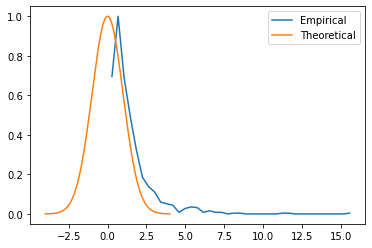

In [17]:
## generate data

n = 1000
# data = np.random.randn(n)
data = np.exp(np.random.randn(n)*.8) # log-normal distribution

# theoretical normal distribution given N
x = np.linspace(-4, 4, 10001)
theonorm = stats.norm.pdf(x)
theonorm = theonorm/max(theonorm)

# plot histograms on top of each other
yy, xx = np.histogram(data, 40)
yy = yy / max(yy)
xx = (xx[:-1] + xx[1:]) / 2

plt.plot(xx, yy, label='Empirical')
plt.plot(x, theonorm, label='Theoretical')
plt.legend()
plt.show()

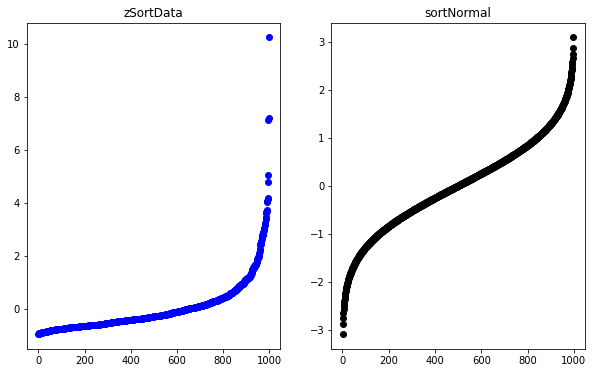

In [18]:
## create a QQ plot

zSortData = np.sort(stats.zscore(data))
sortNormal = stats.norm.ppf(np.linspace(0, 1, n))

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].plot(zSortData, 'bo')
ax[0].set_title('zSortData')

ax[1].plot(sortNormal, 'ko')
ax[1].set_title('sortNormal')
plt.show()

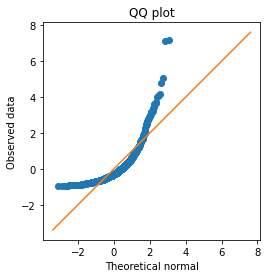

In [19]:
# QQ plot is theory vs reality
plt.plot(sortNormal, zSortData, 'o')

# set axes to be equal
xL, xR = plt.xlim()
yL, yR = plt.ylim()
lims = [np.min([xL, xR, yL, yR]), np.max([xL, xR, yL, yR])]
plt.xlim(lims)
plt.ylim(lims)

# draw red comparison line
plt.plot(lims, lims)
plt.xlabel('Theoretical normal')
plt.ylabel('Observed data')
plt.title('QQ plot')
plt.axis('square')
plt.show()

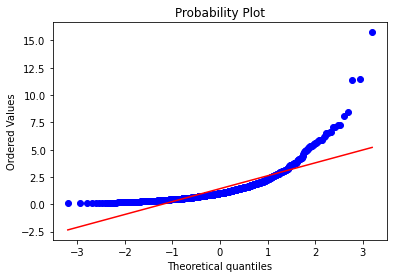

In [20]:
## python solution
x = stats.probplot(data, plot=plt)